# **DNN- Experiment 7**

*   **SIA VASHIST**
*    PRN: 20190802107

---

In [8]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Define the number of input and output neurons, as well as the size of the hidden layers
n_inputs = 2
n_outputs = 2
n_hidden1 = 64
n_hidden2 = 32
n_hidden3 = 16

# Define the model architecture
model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hidden1),
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden1, n_hidden2),
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden2, n_hidden3),
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden3, n_outputs)
)


In [9]:
# Generate the Moon dataset for training and testing
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

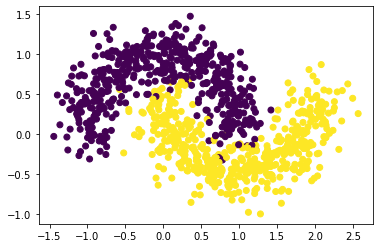

In [10]:
# Visualize dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.show()

In [11]:
# Convert the data to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [12]:
# Define the loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
# Train the model
n_epochs = 10000
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X_train)
    train_loss = loss_fn(y_pred, y_train)
    test_loss = loss_fn(model(X_test), y_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Backward pass
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Print the training and testing loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch 0: Train Loss: 0.6728, Test Loss: 0.6735
Epoch 100: Train Loss: 0.0575, Test Loss: 0.0415
Epoch 200: Train Loss: 0.0566, Test Loss: 0.0492
Epoch 300: Train Loss: 0.0546, Test Loss: 0.0480
Epoch 400: Train Loss: 0.0524, Test Loss: 0.0457
Epoch 500: Train Loss: 0.0501, Test Loss: 0.0411
Epoch 600: Train Loss: 0.0504, Test Loss: 0.0587
Epoch 700: Train Loss: 0.0439, Test Loss: 0.0447
Epoch 800: Train Loss: 0.0396, Test Loss: 0.0572
Epoch 900: Train Loss: 0.0366, Test Loss: 0.0586
Epoch 1000: Train Loss: 0.0393, Test Loss: 0.0725
Epoch 1100: Train Loss: 0.0309, Test Loss: 0.0717
Epoch 1200: Train Loss: 0.0304, Test Loss: 0.0651
Epoch 1300: Train Loss: 0.0314, Test Loss: 0.0795
Epoch 1400: Train Loss: 0.0281, Test Loss: 0.0793
Epoch 1500: Train Loss: 0.0304, Test Loss: 0.0703
Epoch 1600: Train Loss: 0.0283, Test Loss: 0.0713
Epoch 1700: Train Loss: 0.0240, Test Loss: 0.0739
Epoch 1800: Train Loss: 0.0226, Test Loss: 0.0751
Epoch 1900: Train Loss: 0.0248, Test Loss: 0.0892
Epoch 2000: 

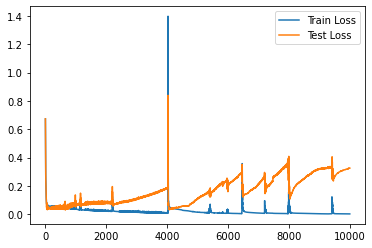

In [14]:
# Plot the training and testing loss
plt.plot([i.detach().numpy() for i in train_losses], label='Train Loss')
plt.plot([i.detach().numpy() for i in test_losses], label='Test Loss')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8328\3957665579.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Z = model(torch.tensor(torch.stack([xx.ravel(), yy.ravel()], axis=1), dtype=torch.float32))


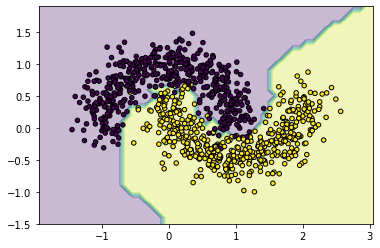

In [15]:
# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.tensor(torch.stack([xx.ravel(), yy.ravel()], axis=1), dtype=torch.float32))
Z = torch.argmax(Z, dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.show()


# Conclusion:
This defines a neural network with three hidden layers, using ReLU activation functions, which is trained on the "moons" dataset using cross-entropy loss and the Adam optimizer. The training and testing loss are plotted to assess the performance of the model. Finally, the decision boundary is visualized using a contour plot overlaid on the original dataset. This is a great example of a simple classification problem and how a neural network can be trained to solve it.